<a href="https://colab.research.google.com/github/RihaChri/PCA/blob/main/PrincipalComponentAnalysisAndLDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


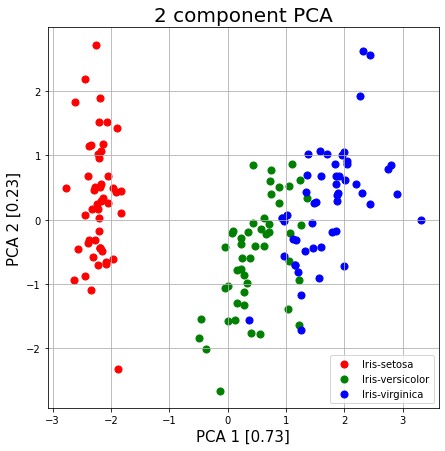

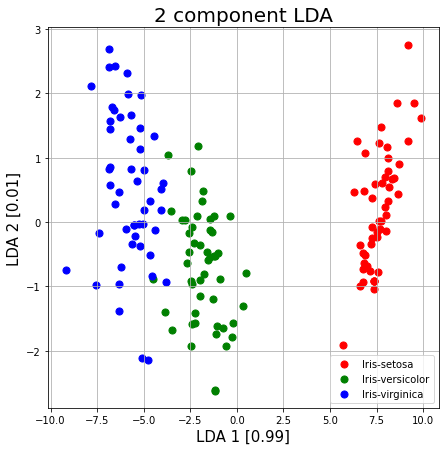

In [ ]:
#PCA and LDA for visualizing Data and to speed up other machine learning algorithms

#PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

x = df.loc[:, ['sepal length', 'sepal width', 'petal length', 'petal width']].values
y = df.loc[:,['target']].values


# Feature Scaling
xScaled = StandardScaler().fit_transform(x)

#Projection to 2D (2 principal components)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(xScaled)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df[['target']]], axis = 1)



fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PCA 1 [{:.2f}]'.format(pca.explained_variance_ratio_[0]), fontsize = 15)
ax.set_ylabel('PCA 2 [{:.2f}]'.format(pca.explained_variance_ratio_[1]), fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


#LDA
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(x, y)
principalDflda = pd.DataFrame(data = X_lda
             , columns = ['lda 1', 'lda 2'])

finalDflda = pd.concat([principalDflda, df[['target']]], axis = 1)


fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('LDA 1 [{:.2f}]'.format(lda.explained_variance_ratio_[0]), fontsize = 15)
ax.set_ylabel('LDA 2 [{:.2f}]'.format(lda.explained_variance_ratio_[1]), fontsize = 15)
ax.set_title('2 component LDA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDflda['target'] == target
    ax.scatter(finalDflda.loc[indicesToKeep, 'lda 1']
               , finalDflda.loc[indicesToKeep, 'lda 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

